In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

There are no missing data

In [6]:
df.duplicated().sum()

0

There are no duplicates data

In [8]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

The branch, city, customer type, gender, and product line is a categorical type data

__Change date and time to datetime data__ and
__Exctract day of the week data__

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [237]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.strftime('%H')

In [44]:
df['Day'] = df['Date'].dt.day_name

# EDA

## Countplot

In [15]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

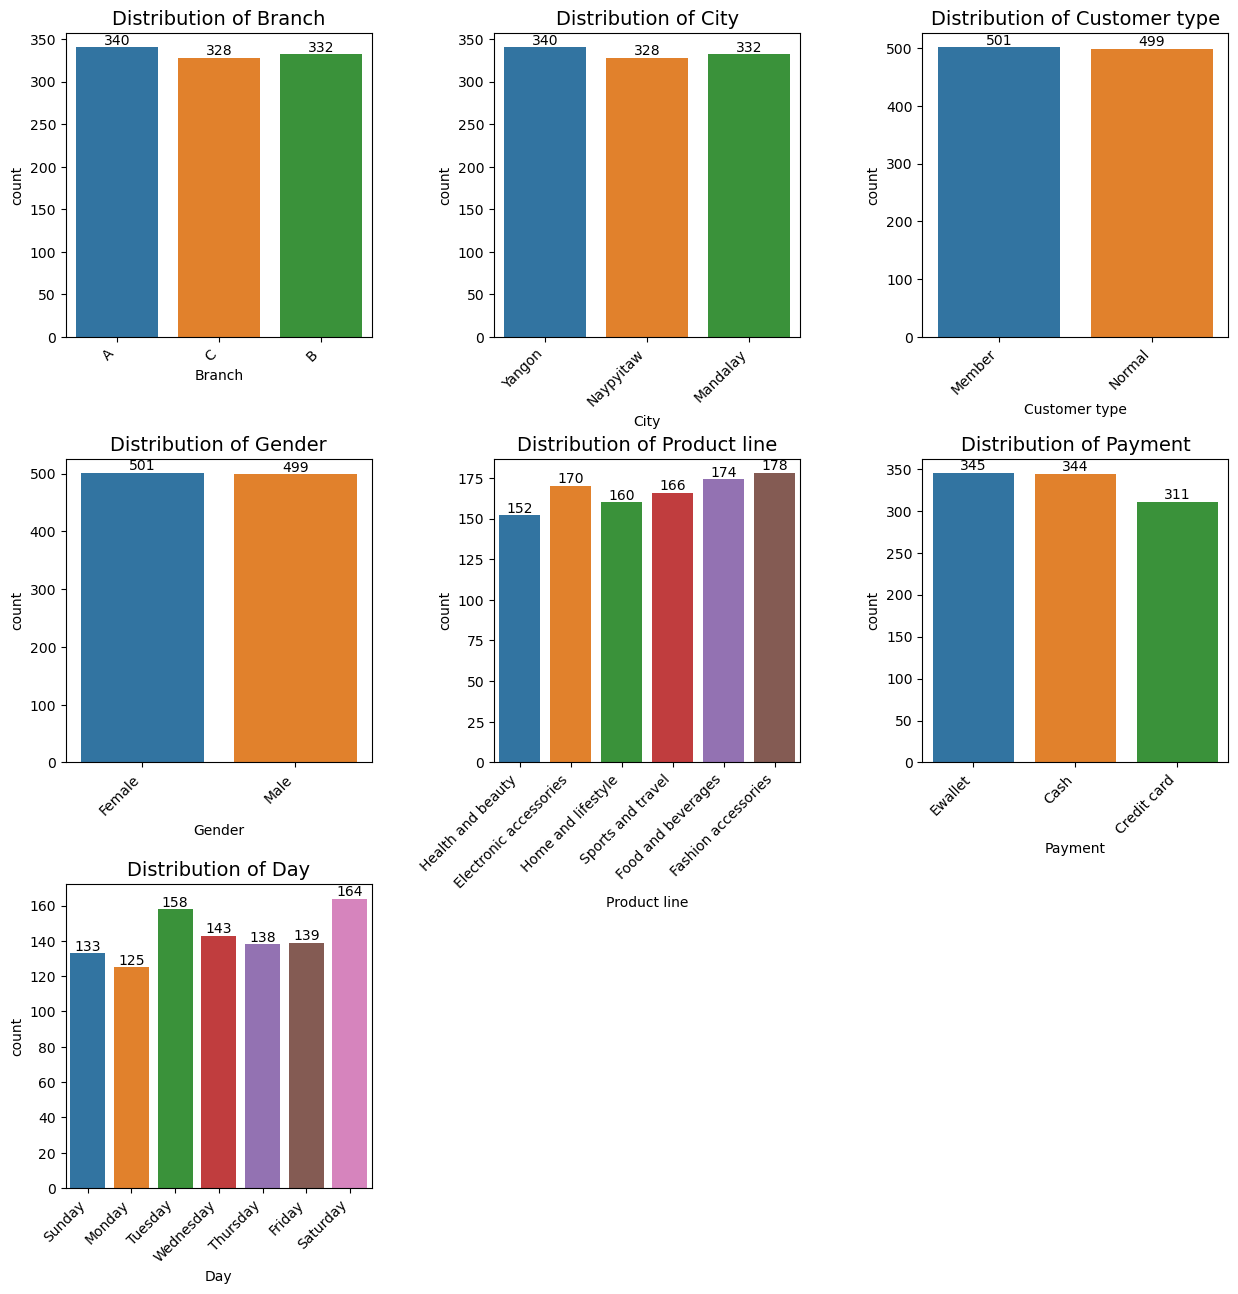

In [178]:
variables = ['Branch', 'City', 'Customer type', 'Gender', 'Product line','Payment', 'Day']
fig, ax = plt.subplots(figsize = (15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(len(variables)):
    plt.subplot(3,3,i+1)
    if variables[i] == 'Day':
        ax = sns.countplot(data=df, x=df[variables[i]], order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
    else: 
        ax = sns.countplot(data=df, x=df[variables[i]])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {variables[i]}', fontsize=14)
    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points');
# Show the plot
plt.show();

## Pie Charts

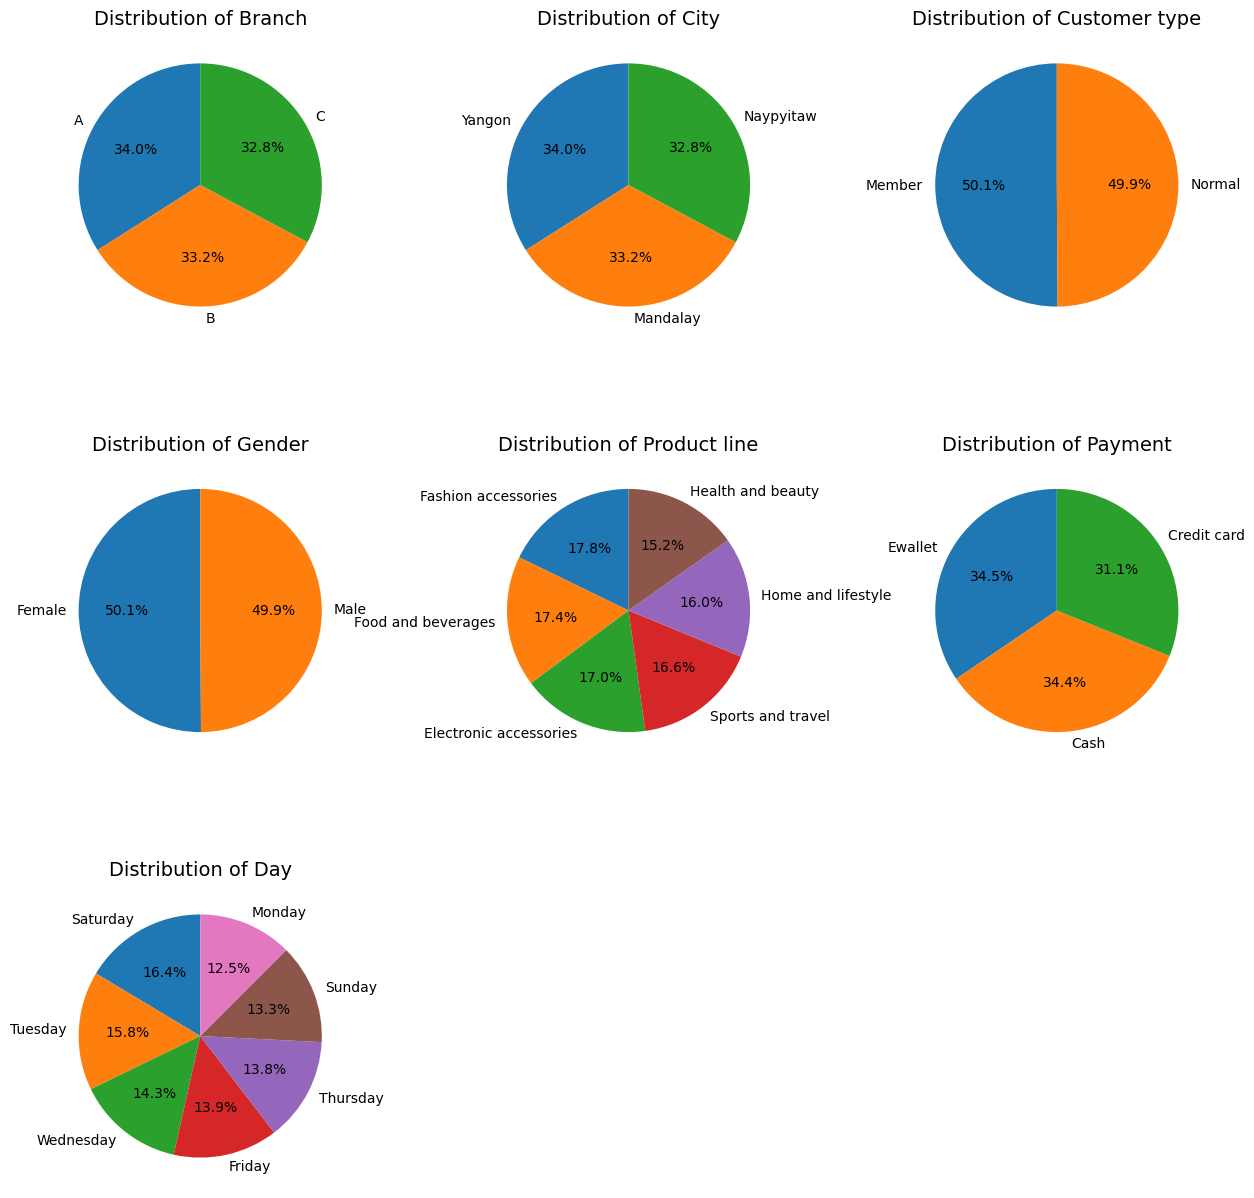

In [99]:
variables = ['Branch', 'City', 'Customer type', 'Gender', 'Product line','Payment', 'Day']
fig, ax = plt.subplots(figsize = (15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(len(variables)):
    plt.subplot(3,3,i+1)
    cat_counts = df[variables[i]].value_counts()
    cat_labels = cat_counts.index
    plt.pie(x= cat_counts, labels= cat_labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {variables[i]}', fontsize=14)
plt.show();

## The DataFrame for EDA

In [ ]:
variables = ['Branch', 'City', 'Customer type', 'Gender', 'Product line','Payment', 'Day']

In [148]:
branch = df.groupby('Branch', as_index=False).agg({'Total':'mean', 'gross income':'mean', 'Rating':'mean'})
city = df.groupby('City', as_index=False).agg({'Total':'mean', 'gross income':'mean', 'Rating':'mean'})
customer_type = df.groupby('Customer type', as_index=False).agg({'Total':'mean', 'gross income':'mean', 'Rating':'mean'})
gender = df.groupby('Gender', as_index=False).agg({'Total':'mean', 'gross income':'mean', 'Rating':'mean'})
product_line = df.groupby('Product line', as_index=False).agg({'Total':'mean', 'gross income':'mean', 'Rating':'mean'})
payment = df.groupby('Payment', as_index=False).agg({'Total':'mean', 'gross income':'mean', 'Rating':'mean'})
day = df.groupby('Day', as_index=False).agg({'Total':'mean', 'gross income':'mean', 'Rating':'mean'})

### Average total

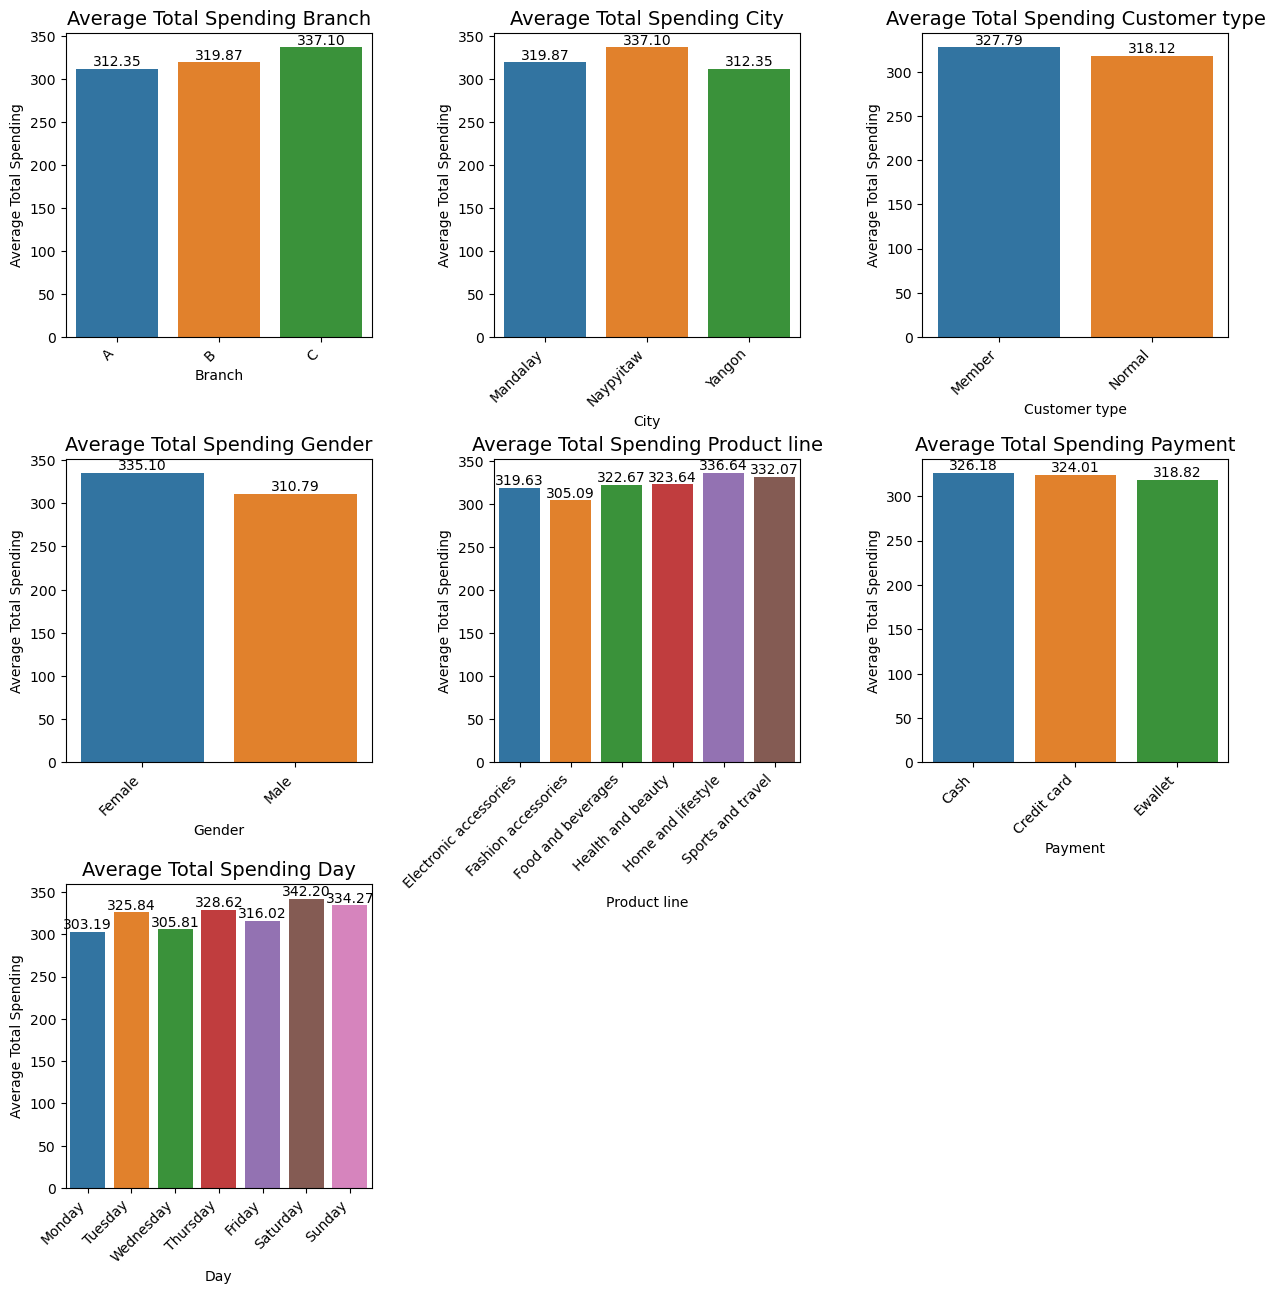

In [208]:
variables = ['Branch', 'City', 'Customer type', 'Gender', 'Product line','Payment', 'Day']
data = [branch, city, customer_type, gender, product_line, payment, day]
fig, ax = plt.subplots(figsize = (15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(len(variables)):
    plt.subplot(3,3,i+1)
    if variables[i] == 'Day':
        ax = sns.barplot(data=data[i], x=data[i][variables[i]], y=data[i].Total, order=[ "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    else: 
        ax = sns.barplot(data=data[i], x=data[i][variables[i]], y=data[i].Total)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Average Total Spending')
    plt.title(f'Average Total Spending {variables[i]}', fontsize=14)
    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points');
# Show the plot
plt.show();

### Average Gross Income

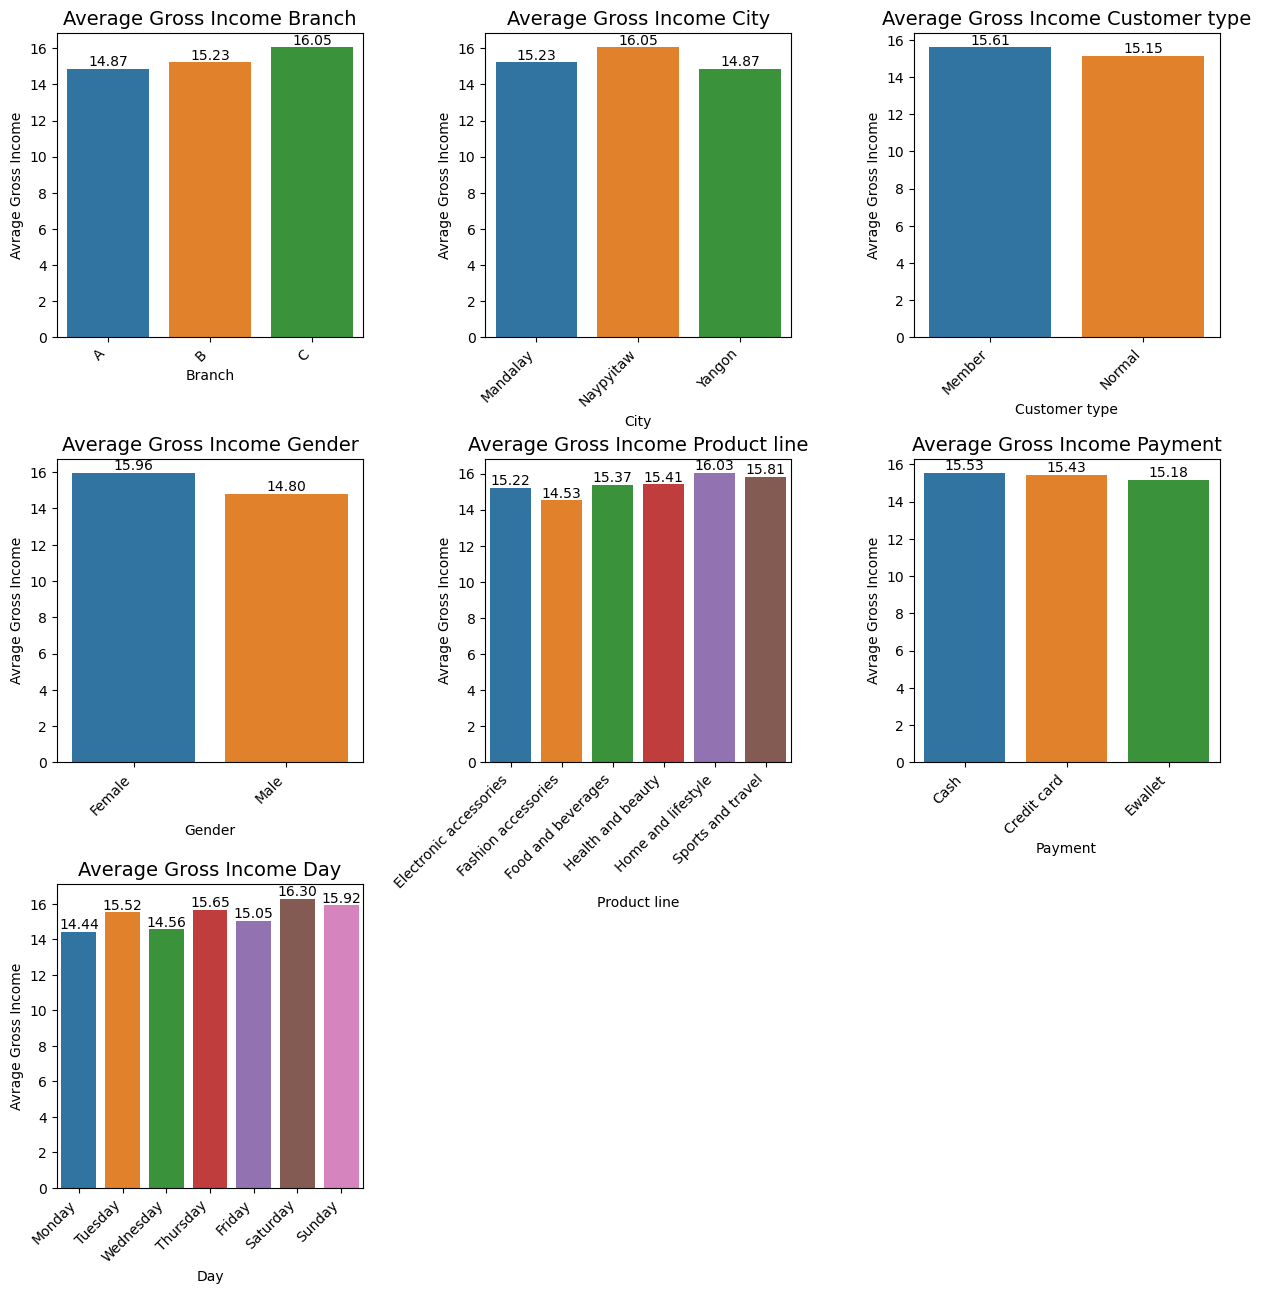

In [206]:
variables = ['Branch', 'City', 'Customer type', 'Gender', 'Product line','Payment', 'Day']
data = [branch, city, customer_type, gender, product_line, payment, day]
fig, ax = plt.subplots(figsize = (15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(len(variables)):
    plt.subplot(3,3,i+1)
    if variables[i] == 'Day':
        ax = sns.barplot(data=data[i], x=data[i][variables[i]], y=data[i]['gross income'], order=[ "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"])
    else: 
        ax = sns.barplot(data=data[i], x=data[i][variables[i]], y=data[i]['gross income'])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Average Gross Income {variables[i]}', fontsize=14)
    plt.ylabel('Avrage Gross Income')
    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points');
# Show the plot
plt.show();

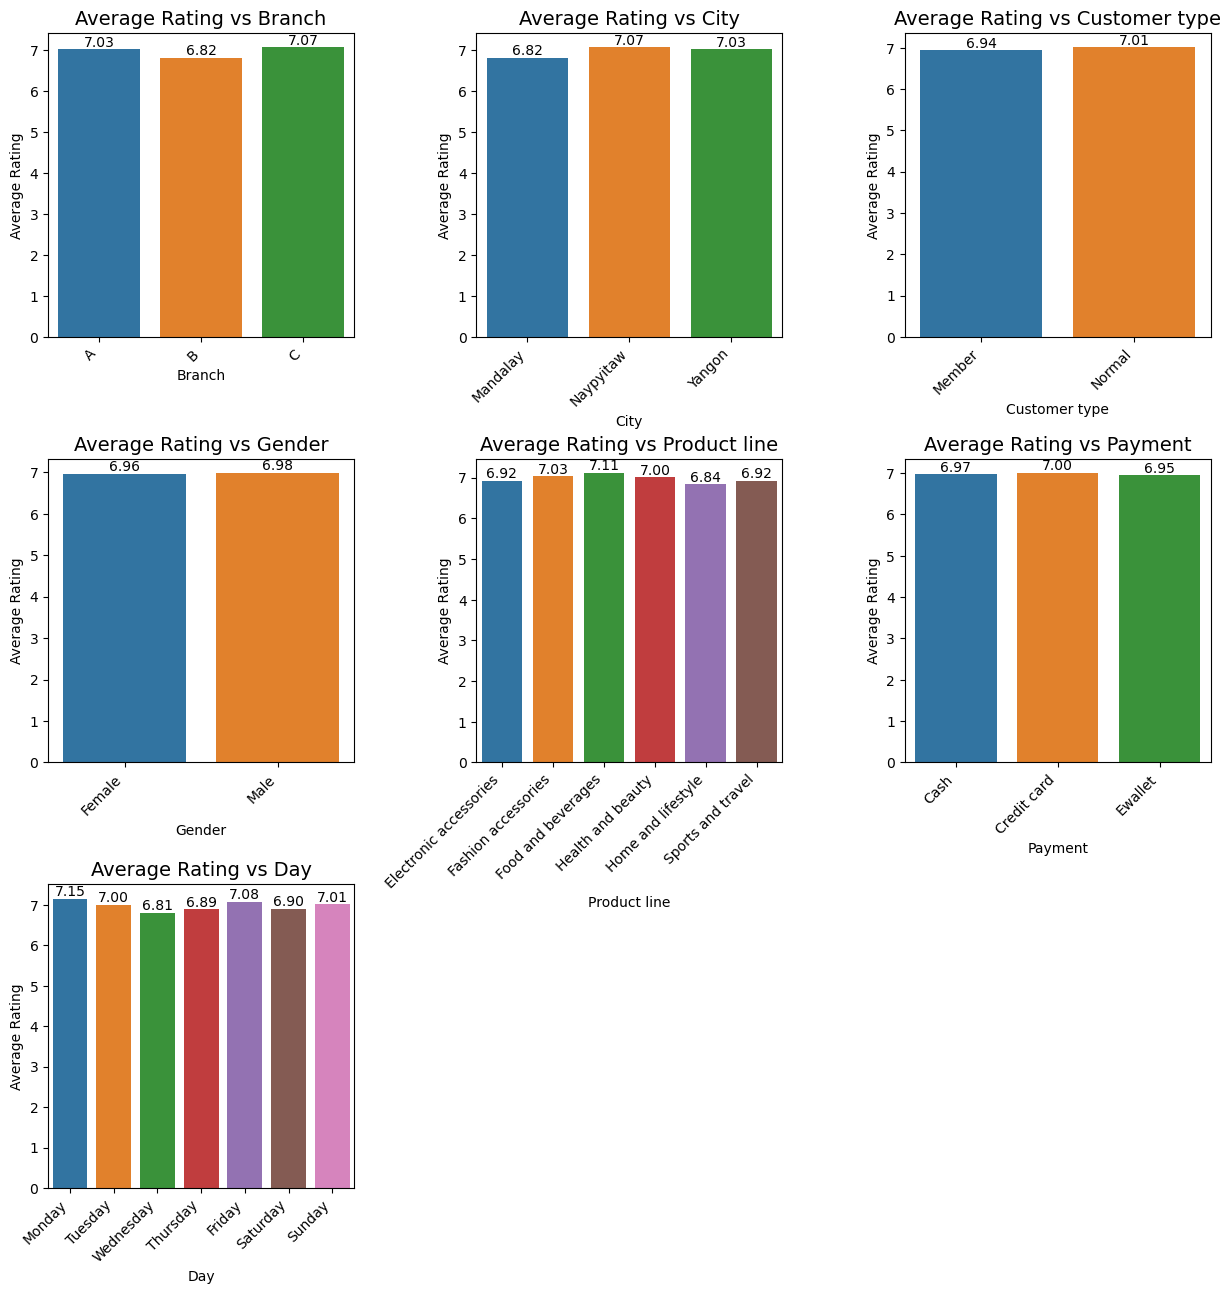

In [204]:
variables = ['Branch', 'City', 'Customer type', 'Gender', 'Product line','Payment', 'Day']
data = [branch, city, customer_type, gender, product_line, payment, day]
fig, ax = plt.subplots(figsize = (15,15))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for i in range(len(variables)):
    plt.subplot(3,3,i+1)
    if variables[i] == 'Day':
        ax = sns.barplot(data=data[i], x=data[i][variables[i]], y=data[i]['Rating'], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    else: 
        ax = sns.barplot(data=data[i], x=data[i][variables[i]], y=data[i]['Rating'])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Average Rating vs {variables[i]}', fontsize=14)
    plt.ylabel('Average Rating')
    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points');
# Show the plot
plt.show();

## Time Series

In [239]:
df['Time'].nunique()

11

In [241]:
df['Time'].unique()

array(['13', '10', '20', '18', '14', '11', '17', '16', '19', '15', '12'],
      dtype=object)

In [350]:
time_series = df.groupby(['Time','Branch', 'City', 'Customer type', 'Gender', 'Product line','Payment', 'Day'], as_index=False).agg({'Total':'mean', 'gross income':'mean', 'Rating':'mean'})

<Axes: xlabel='Time', ylabel='Rating'>

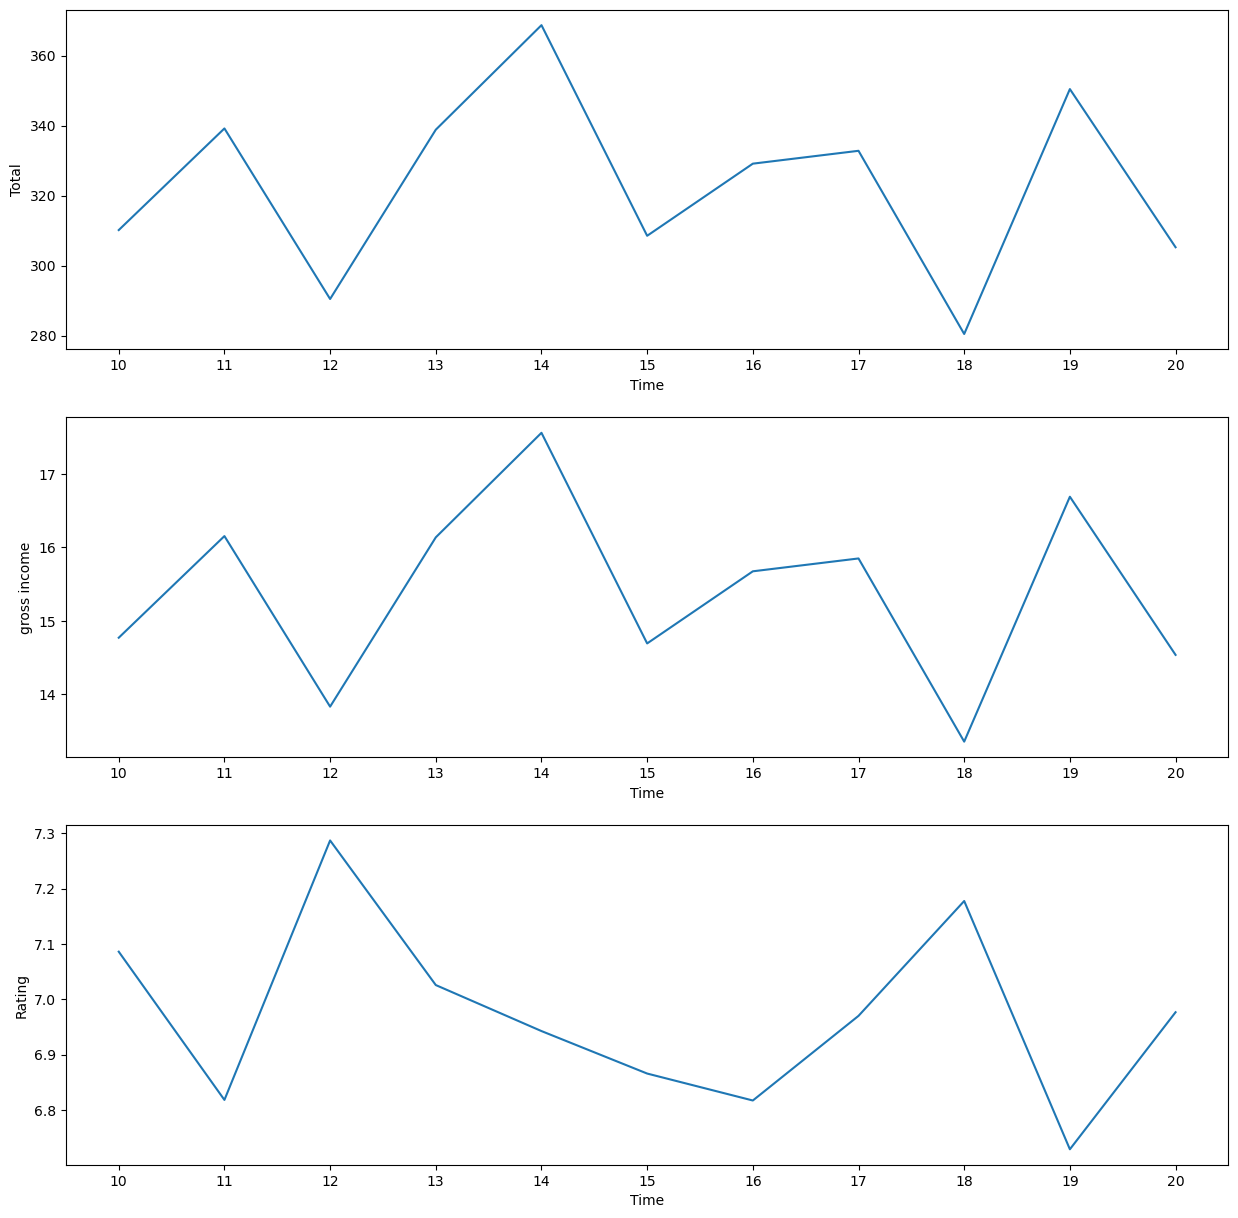

In [372]:
fig, axs = plt.subplots(3,1,figsize = (15,15))
sns.lineplot(data=time_series, x=time_series['Time'], y=time_series['Total'], ax=axs[0], errorbar=None)
sns.lineplot(data=time_series, x=time_series['Time'], y=time_series['gross income'], ax=axs[1], errorbar=None)
sns.lineplot(data=time_series, x=time_series['Time'], y=time_series['Rating'], ax=axs[2], errorbar=None)

<Axes: xlabel='Time', ylabel='Rating'>

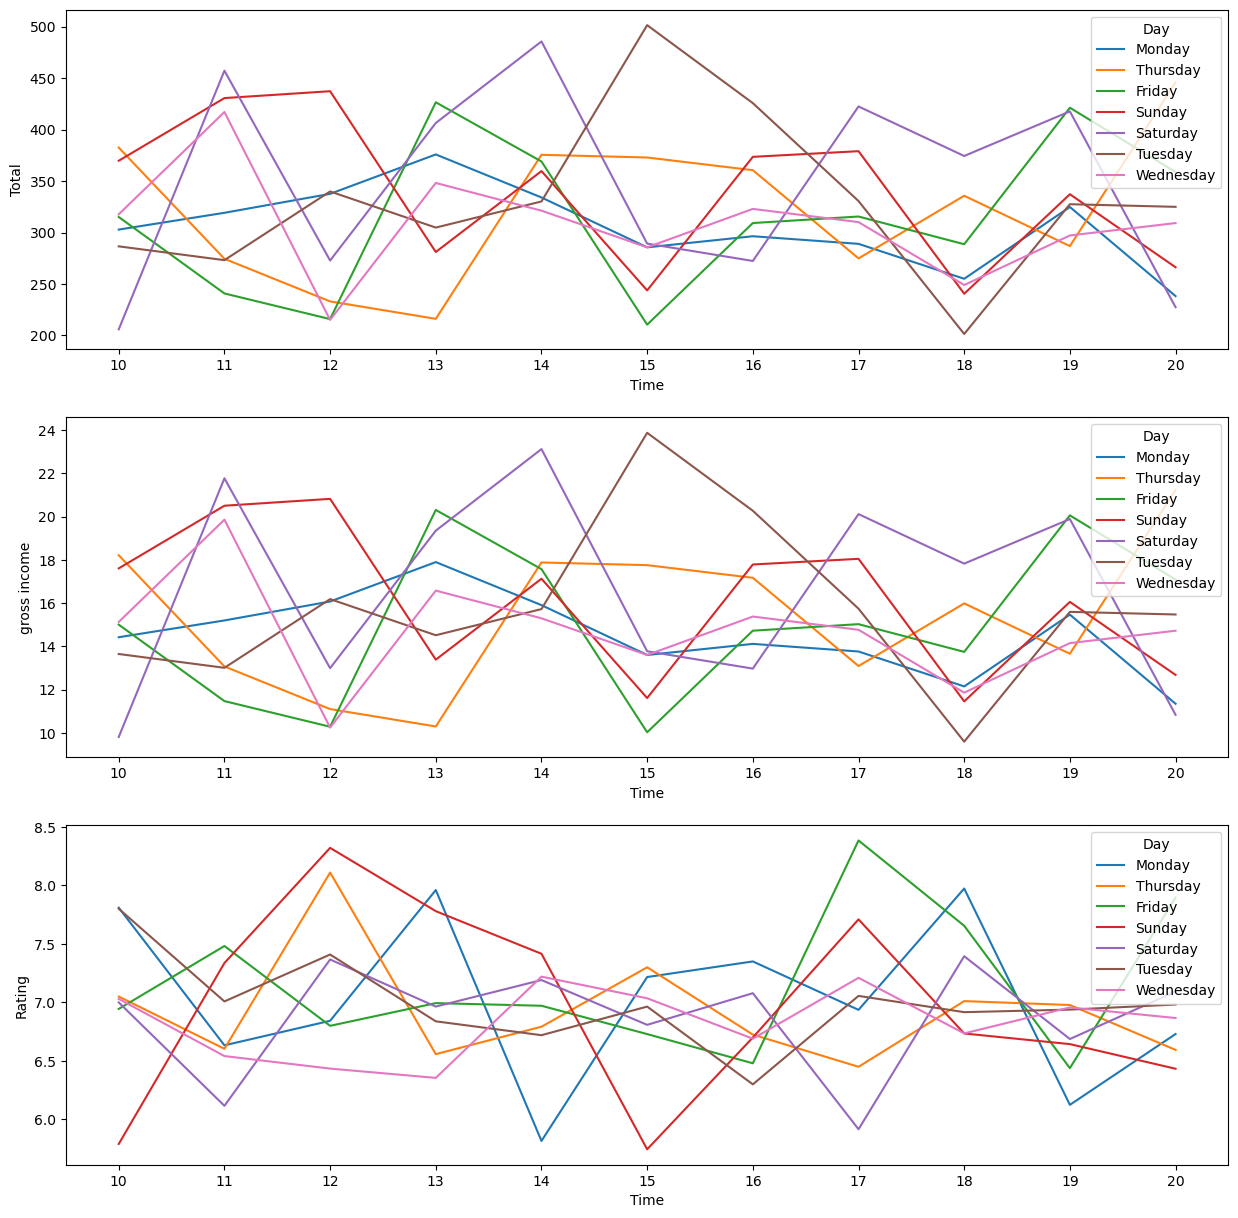

In [376]:
fig, axs = plt.subplots(3,1,figsize = (15,15))
sns.lineplot(data=time_series, x=time_series['Time'], y=time_series['Total'], ax=axs[0], hue='Day', errorbar=None)
sns.lineplot(data=time_series, x=time_series['Time'], y=time_series['gross income'], ax=axs[1], hue='Day', errorbar=None)
sns.lineplot(data=time_series, x=time_series['Time'], y=time_series['Rating'], ax=axs[2], hue='Day', errorbar=None)

<Axes: xlabel='Time', ylabel='Rating'>

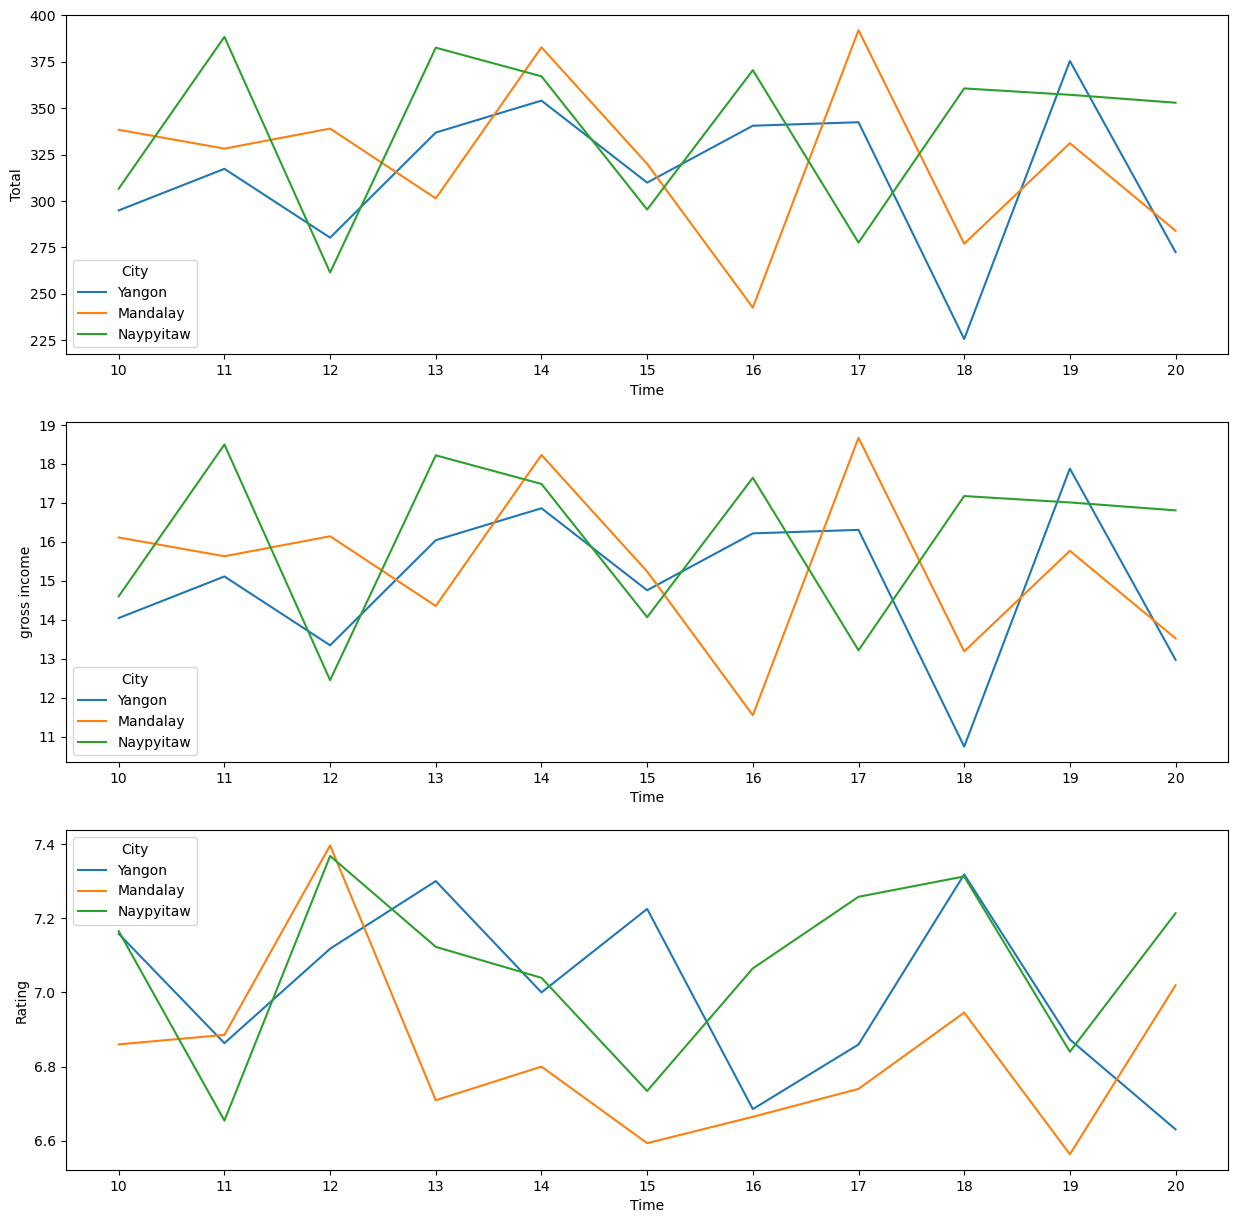

In [374]:
fig, axs = plt.subplots(3,1,figsize = (15,15))
sns.lineplot(data=time_series, x=time_series['Time'], y=time_series['Total'], ax=axs[0], hue='City', errorbar=None)
sns.lineplot(data=time_series, x=time_series['Time'], y=time_series['gross income'], ax=axs[1], hue='City', errorbar=None)
sns.lineplot(data=time_series, x=time_series['Time'], y=time_series['Rating'], ax=axs[2], hue='City', errorbar=None)